In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

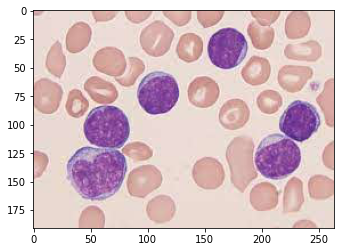

In [3]:
cvimg = cv2.imread('dataset/train/img-1.jpg')
rgbimg = cv2.cvtColor(cvimg, cv2.COLOR_BGR2RGB)
plt.imshow(rgbimg)

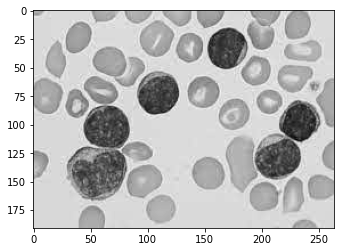

In [4]:
gsimg = cv2.cvtColor(cvimg, cv2.COLOR_BGR2GRAY)
plt.imshow(gsimg, 'gray')

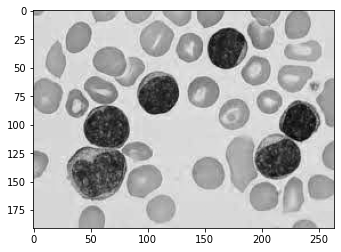

In [5]:
greenimg = cvimg[:,:,1].astype('float64')
greenimg *= (255.0/greenimg.max())
greenimg = greenimg.astype('uint8')
plt.imshow(greenimg, 'gray')

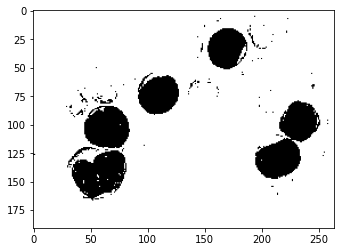

In [6]:
adabingreenimg = cv2.adaptiveThreshold(greenimg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 535, 64)
plt.imshow(adabingreenimg, 'gray')

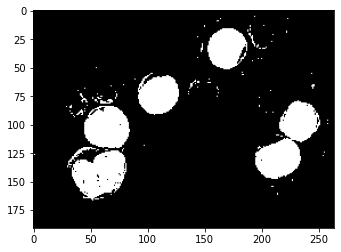

In [7]:
invadabingreenimg = 255-adabingreenimg
plt.imshow(invadabingreenimg, 'gray')

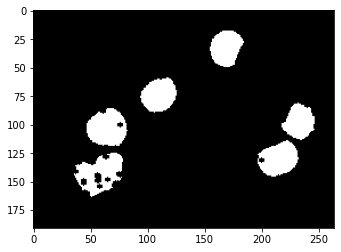

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
erodedinvadabingreenimg = cv2.erode(invadabingreenimg, kernel, iterations=1)
plt.imshow(erodedinvadabingreenimg, 'gray')

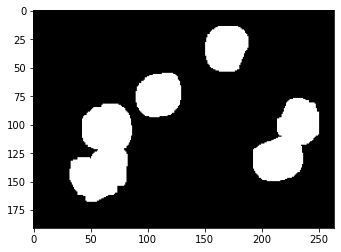

In [18]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilatederodedinvadabingreenimg = cv2.dilate(erodedinvadabingreenimg, kernel, iterations=4)
plt.imshow(dilatederodedinvadabingreenimg, 'gray')

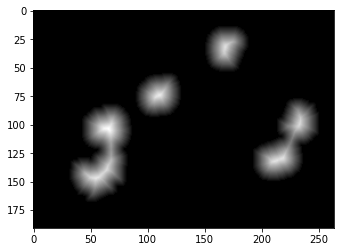

In [19]:
dtdilatederodedinvadabingreenimg = cv2.distanceTransform(dilatederodedinvadabingreenimg,cv2.DIST_L2,5)
plt.imshow(dtdilatederodedinvadabingreenimg, 'gray')

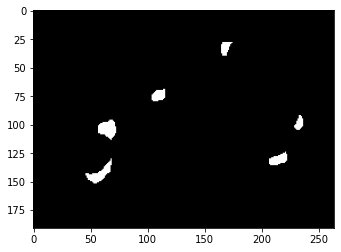

In [20]:
_, temp = cv2.threshold(dtdilatederodedinvadabingreenimg,0.7*dtdilatederodedinvadabingreenimg.max(),255,0)
defwhitecells = np.uint8(temp)
plt.imshow(defwhitecells, 'gray')

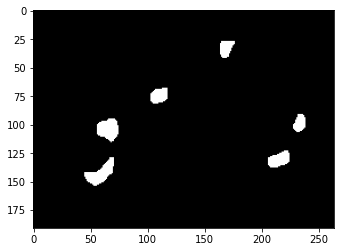

In [24]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
whitecells = cv2.dilate(defwhitecells, kernel, iterations=1)
plt.imshow(whitecells, 'gray')

In [25]:
_, whitecellscontours, _ = cv2.findContours(whitecells, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(whitecellscontours))

6


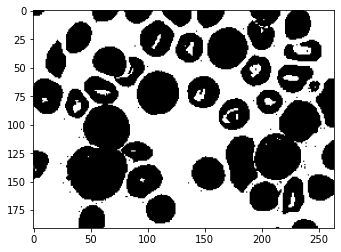

In [26]:
adabingsimg = cv2.adaptiveThreshold(gsimg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 535, 0)
plt.imshow(adabingsimg, 'gray')

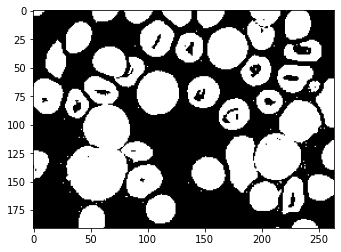

In [27]:
invadabingsimg = 255 - adabingsimg
plt.imshow(invadabingsimg, 'gray')

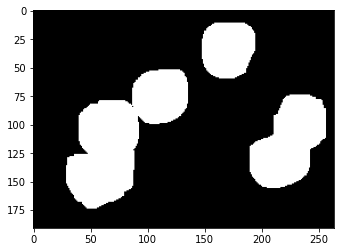

In [31]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
surewhitecells = cv2.dilate(dilatederodedinvadabingreenimg, kernel, iterations=3)
plt.imshow(surewhitecells, 'gray')

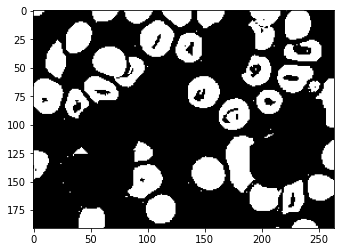

In [33]:
redinvadabingsimg = cv2.subtract(invadabingsimg, surewhitecells)
plt.imshow(redinvadabingsimg, 'gray')

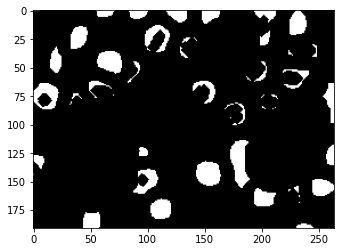

In [36]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
erodedredinvadabingsimg = cv2.erode(redinvadabingsimg, kernel, iterations=4)
plt.imshow(erodedredinvadabingsimg, 'gray')

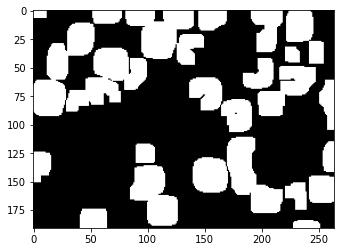

In [39]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4))
dilatederodedredinvadabingsimg = cv2.dilate(erodedredinvadabingsimg, kernel, iterations=3)
plt.imshow(dilatederodedredinvadabingsimg, 'gray')

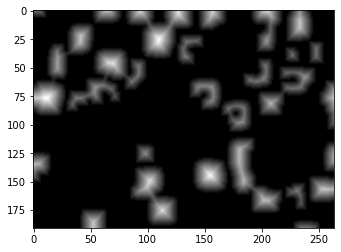

In [40]:
dtdilatederodedredinvadabingsimg = cv2.distanceTransform(dilatederodedredinvadabingsimg,cv2.DIST_L2,5)
plt.imshow(dtdilatederodedredinvadabingsimg, 'gray')

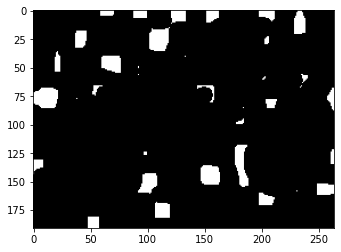

In [47]:
_, temp = cv2.threshold(dtdilatederodedredinvadabingsimg,0.45*dtdilatederodedredinvadabingsimg.max(),255,0)
defredcells = np.uint8(temp)
plt.imshow(defredcells, 'gray')

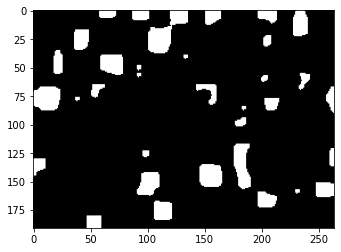

In [48]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
redcells = cv2.dilate(defredcells, kernel, iterations=1)
plt.imshow(redcells, 'gray')

In [46]:
_, redcellscontours, _ = cv2.findContours(redcells, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(redcellscontours))

38
